# Data Cleaning (Notebook 1 of 4) 

In [212]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [213]:
# Loading csv file
data = pd.read_csv('../1_raw_data/cc_from_qgis.csv')
data.head(5)

osm_id  ncc_owned  osm_way_id  house_area  house_peri  house_vert  \
0  35546036          1    35546036          65          35           7   
1  35546037          1    35546037          65          34           8   
2  35551461          1    35551461          65          35           7   
3  35551462          1    35551462          66          34           8   
4  35551463          1    35551463          72          35           9   

  private    house_lati  NATIONALCA  land_area  land_perim  land_verti  \
0     yes  6.971770e+06         NaN       65.0        35.0         7.0   
1     yes  6.971743e+06         NaN       65.0        35.0         8.0   
2     yes  6.971805e+06         NaN       62.0        34.0         8.0   
3     yes  6.971754e+06  29324493.0      207.0        62.0        12.0   
4     yes  6.971806e+06         NaN       63.0        35.0         8.0   

    land_longi    land_latit  COUNT  house_long  b2lpercent  
0 -128246.3195  6.971771e+06      4  -128248.80       100.0  
1 -128272.9071  6.971744e+06      4  -128275.85       100.0  
2 -128283.5621  6.971806e+06      4  -128286.18       105.0  
3 -128367.6972  6.971752e+06      1  -128372.04        32.0  
4 -128339.0663  6.971806e+06      4  -128340.80       114.0

In [214]:
# Removing rows without values of 'NationalCA' and 'osm_way_id' - to ensure each polygon is associated with a building and / or piece of land
data = data[ ~  (data['NATIONALCA'].isna())  ]
data = data[ ~  (data['osm_way_id'].isna())  ]
data.head(5)

osm_id  ncc_owned  osm_way_id  house_area  house_peri  house_vert  \
3   35551462          1    35551462          66          34           8   
10  43078229          0    43078229          70          34           4   
11  43085224          0    43085224          64          36           7   
13  61738713          0    61738713          49          34           6   
14  61738716          0    61738716          43          26           5   

   private    house_lati  NATIONALCA  land_area  land_perim  land_verti  \
3      yes  6.971754e+06  29324493.0      207.0        62.0        12.0   
10      no  6.972089e+06  29416618.0     1261.0       151.0        36.0   
11      no  6.971535e+06  29377074.0       99.0        49.0        11.0   
13      no  6.972128e+06  57498481.0      109.0        62.0        10.0   
14      no  6.971831e+06  29411248.0      140.0        53.0        15.0   

     land_longi    land_latit  COUNT  house_long  b2lpercent  
3  -128367.6972  6.971752e+06      1  -128372.04        32.0  
10 -127157.2719  6.972083e+06      1  -127167.64         6.0  
11 -127695.2368  6.971542e+06      2  -127694.90        65.0  
13 -127194.3206  6.972131e+06      1  -127187.21        45.0  
14 -127217.3529  6.971832e+06      2  -127213.44        31.0

In [215]:
# Filling in empty values with 'no'
index = data['private'] == 'yes'
data['private'][~index] = "no"
data.head(5)

/var/folders/jf/_h21nlf54hq6220nzhj98l7h0000gn/T/ipykernel_17863/454849472.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



osm_id  ncc_owned  osm_way_id  house_area  house_peri  house_vert  \
3   35551462          1    35551462          66          34           8   
10  43078229          0    43078229          70          34           4   
11  43085224          0    43085224          64          36           7   
13  61738713          0    61738713          49          34           6   
14  61738716          0    61738716          43          26           5   

   private    house_lati  NATIONALCA  land_area  land_perim  land_verti  \
3      yes  6.971754e+06  29324493.0      207.0        62.0        12.0   
10      no  6.972089e+06  29416618.0     1261.0       151.0        36.0   
11      no  6.971535e+06  29377074.0       99.0        49.0        11.0   
13      no  6.972128e+06  57498481.0      109.0        62.0        10.0   
14      no  6.971831e+06  29411248.0      140.0        53.0        15.0   

     land_longi    land_latit  COUNT  house_long  b2lpercent  
3  -128367.6972  6.971752e+06      1  -128372.04        32.0  
10 -127157.2719  6.972083e+06      1  -127167.64         6.0  
11 -127695.2368  6.971542e+06      2  -127694.90        65.0  
13 -127194.3206  6.972131e+06      1  -127187.21        45.0  
14 -127217.3529  6.971832e+06      2  -127213.44        31.0

In [216]:
# Copying data to the dataframe variable 
df = data.copy()

In [217]:
# Visualing the data for inspection
df.style.background_gradient("coolwarm")

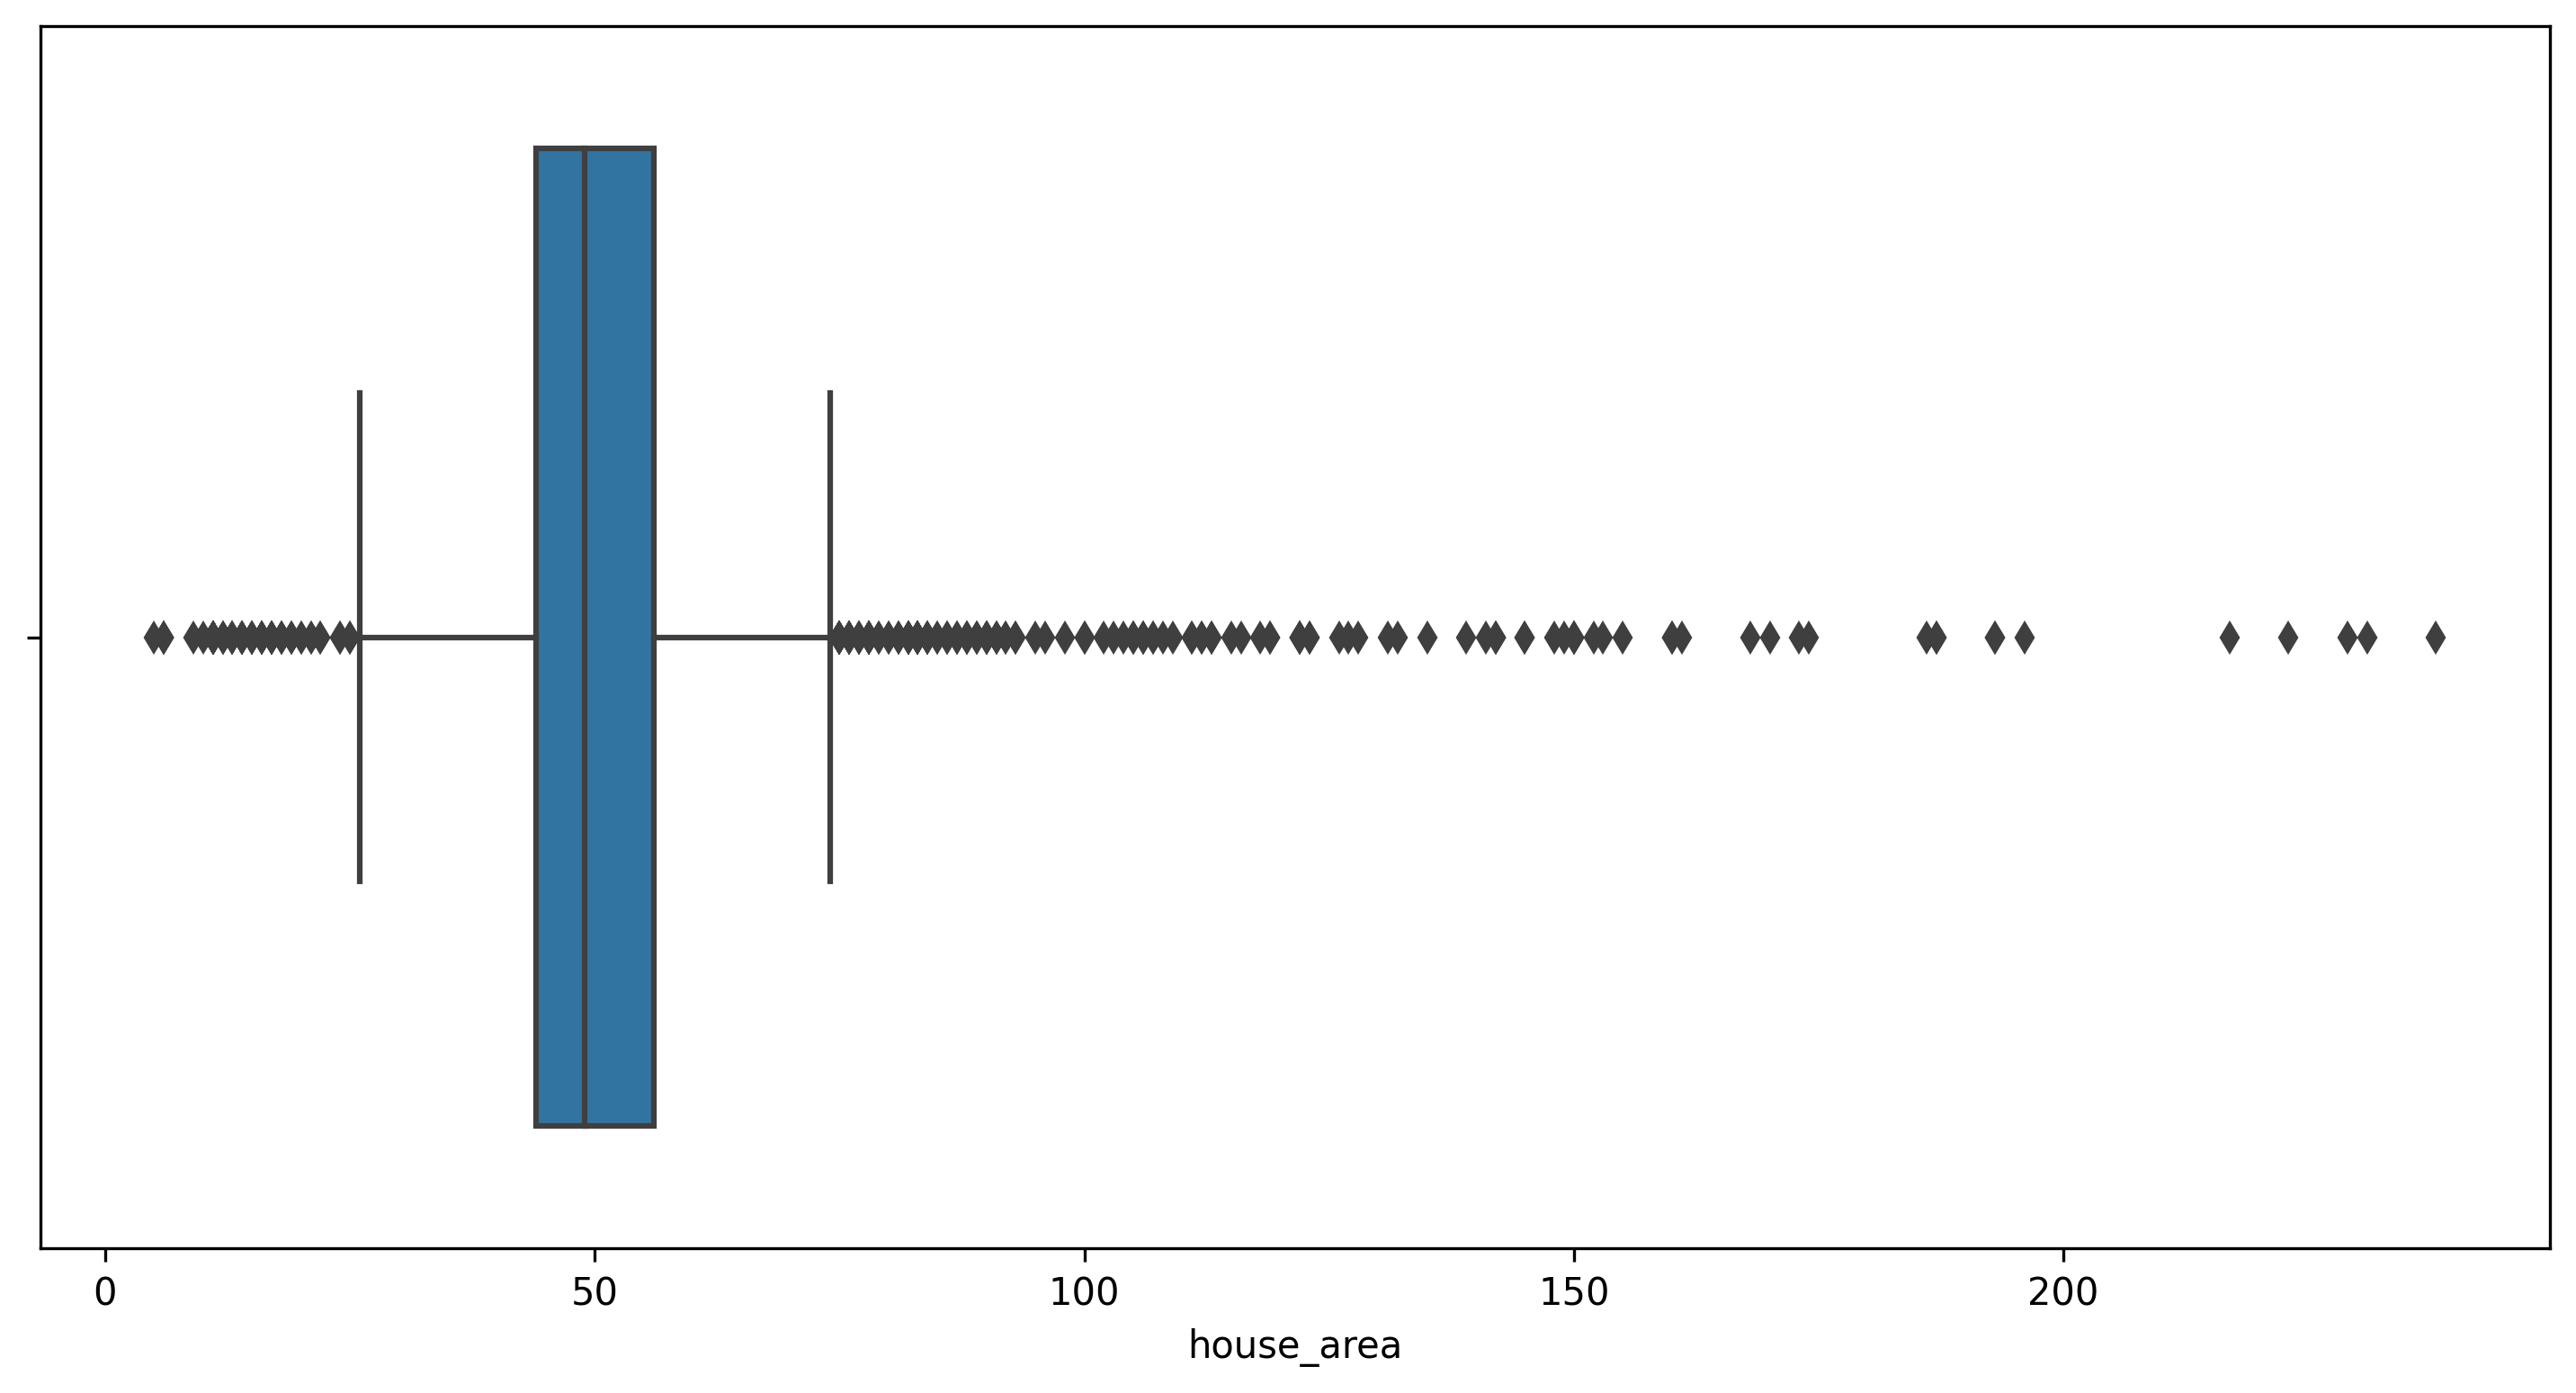

In [218]:
# Box plot of house_area column to see the spread of house_area values
plt.figure(figsize=(12,6),dpi=300)
sns.boxplot(data = df, x = 'house_area')
plt.show()

<AxesSubplot:xlabel='house_area'>

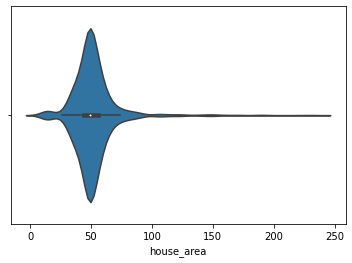

In [219]:
# Violin plot of house area column to see spread of house_area
sns.violinplot(data = df, x = 'house_area')

In [220]:
# Statistical details of each feature
df.describe().transpose()

count          mean           std           min           25%  \
osm_id      2610.0  2.253648e+08  1.194070e+08  3.555146e+07  2.280970e+08   
ncc_owned   2610.0  1.900383e-01  3.924064e-01  0.000000e+00  0.000000e+00   
osm_way_id  2610.0  2.253648e+08  1.194070e+08  3.555146e+07  2.280970e+08   
house_area  2610.0  5.190230e+01  2.021263e+01  5.000000e+00  4.400000e+01   
house_peri  2610.0  3.283180e+01  7.122946e+00  1.000000e+01  2.800000e+01   
house_vert  2610.0  5.935249e+00  1.781690e+00  4.000000e+00  4.000000e+00   
house_lati  2610.0  6.971899e+06  3.631957e+02  6.971109e+06  6.971644e+06   
NATIONALCA  2610.0  3.438860e+07  1.032316e+07  2.921548e+07  2.936356e+07   
land_area   2610.0  1.458180e+02  1.330217e+02  2.200000e+01  8.400000e+01   
land_perim  2610.0  5.770728e+01  2.166314e+01  2.200000e+01  4.700000e+01   
land_verti  2610.0  1.378582e+01  6.790725e+00  4.000000e+00  1.000000e+01   
land_longi  2610.0 -1.276784e+05  5.851482e+02 -1.298614e+05 -1.280478e+05   
land_latit  2610.0  6.971900e+06  3.630326e+02  6.971113e+06  6.971644e+06   
COUNT       2610.0  2.077778e+00  7.555115e-01  1.000000e+00  2.000000e+00   
house_long  2610.0 -1.276790e+05  5.848106e+02 -1.298635e+05 -1.280541e+05   
b2lpercent  2610.0  4.557625e+01  2.131657e+01  1.000000e+00  3.200000e+01   

                     50%           75%           max  
osm_id      2.292286e+08  2.301659e+08  1.161677e+09  
ncc_owned   0.000000e+00  0.000000e+00  1.000000e+00  
osm_way_id  2.292286e+08  2.301659e+08  1.161677e+09  
house_area  4.900000e+01  5.600000e+01  2.380000e+02  
house_peri  3.200000e+01  3.700000e+01  7.500000e+01  
house_vert  6.000000e+00  7.000000e+00  2.100000e+01  
house_lati  6.971860e+06  6.972099e+06  6.973070e+06  
NATIONALCA  2.939313e+07  2.943322e+07  6.262526e+07  
land_area   1.130000e+02  1.520000e+02  1.283000e+03  
land_perim  5.200000e+01  6.200000e+01  3.560000e+02  
land_verti  1.200000e+01  1.500000e+01  1.050000e+02  
land_longi -1.276283e+05 -1.272380e+05 -1.264526e+05  
land_latit  6.971861e+06  6.972099e+06  6.973074e+06  
COUNT       2.000000e+00  2.000000e+00  9.000000e+00  
house_long -1.276261e+05 -1.272373e+05 -1.264483e+05  
b2lpercent  4.400000e+01  6.000000e+01  3.320000e+02

In [221]:
# Datatypes and the shape of each column of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2610 entries, 3 to 3591
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   osm_id      2610 non-null   int64  
 1   ncc_owned   2610 non-null   int64  
 2   osm_way_id  2610 non-null   int64  
 3   house_area  2610 non-null   int64  
 4   house_peri  2610 non-null   int64  
 5   house_vert  2610 non-null   int64  
 6   private     2610 non-null   object 
 7   house_lati  2610 non-null   float64
 8   NATIONALCA  2610 non-null   float64
 9   land_area   2610 non-null   float64
 10  land_perim  2610 non-null   float64
 11  land_verti  2610 non-null   float64
 12  land_longi  2610 non-null   float64
 13  land_latit  2610 non-null   float64
 14  COUNT       2610 non-null   int64  
 15  house_long  2610 non-null   float64
 16  b2lpercent  2610 non-null   float64
dtypes: float64(9), int64(7), object(1)
memory usage: 431.6+ KB


In [222]:
# Column names for features (x) and for the target (y)
x_index = ['land_area','land_perim', 'land_verti', 'land_longi', 'land_latit','house_area', 'house_peri', 'house_vert', 'house_long',
       'house_lati', 'b2lpercent' ]
y_index = ['building']

In [223]:
# Analysing the correlation of the selected features of data
corr_data = df[x_index].corr()
corr_data.style.background_gradient("coolwarm")

<AxesSubplot:>

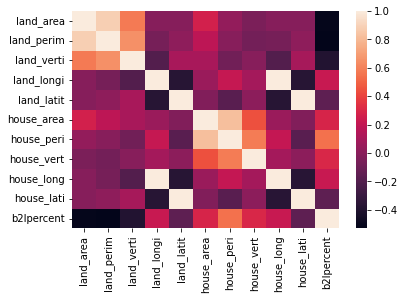

In [224]:
# Feature correlation heatmap
sns.heatmap(df[x_index].corr())

In [225]:
# Returning pairs of highly correlated variables (later we found this is not useful)
corr_matrix = df.corr()

threshold = 0.8
high_corr_var = []

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold and abs(corr_matrix.iloc[i, j]) < 1:
            colname = corr_matrix.columns[i], corr_matrix.columns[j]
            high_corr_var.append(colname)

print(high_corr_var)


[('house_peri', 'house_area'), ('land_perim', 'land_area'), ('land_latit', 'house_lati'), ('house_long', 'land_longi')]


In [226]:
threshold = 0.8
corr_pairs = []

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold and abs(corr_matrix.iloc[i, j]) < 1:
            colname = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            corr_pairs.append(colname)

# Sort the pairs by absolute correlation
sorted_corr_pairs = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)

# Get the top 3 pairs
top_3_pairs = sorted_corr_pairs[:3]

In [227]:
for pair in top_3_pairs:
    print(f"Columns: {pair[0]}, {pair[1]} - Correlation: {pair[2]:.2f}")

Columns: house_long, land_longi - Correlation: 1.00
Columns: land_latit, house_lati - Correlation: 1.00
Columns: land_perim, land_area - Correlation: 0.89


In [228]:
# Selecting the columns for clustering based on these threee features
X = df[['land_verti', 'land_perim', 'house_area']]
X = X.dropna()
X = X.reset_index()
X

index  land_verti  land_perim  house_area
0         3        12.0        62.0          66
1        10        36.0       151.0          70
2        11        11.0        49.0          64
3        13        10.0        62.0          49
4        14        15.0        53.0          43
...     ...         ...         ...         ...
2605   3587        11.0        68.0          51
2606   3588        11.0        68.0          57
2607   3589        11.0        71.0          52
2608   3590         9.0        72.0          50
2609   3591        14.0        67.0          51

[2610 rows x 4 columns]

In [229]:
# make 5 type of clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.predict(X)
X['Cluster'] = labels

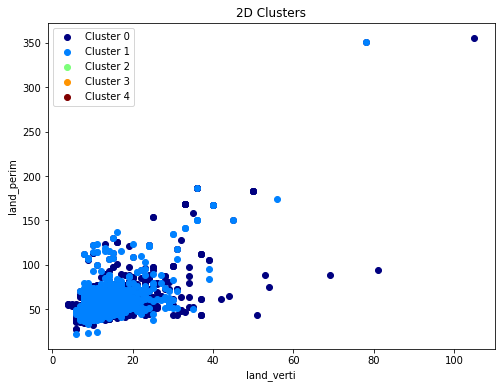

In [230]:
# 2d plot to see clusters

# Initialize a 2D figure
fig, ax = plt.subplots(figsize=(8, 6))

# Color map
colors = plt.cm.jet(np.linspace(0, 1, 5))

# Plot each cluster
for cluster in range(5):
    cluster_data = X[X['Cluster'] == cluster]
    ax.scatter(cluster_data['land_verti'], cluster_data['land_perim'], 
               color=colors[cluster], label=f"Cluster {cluster}")

# Add labels and title
ax.set_xlabel('land_verti')
ax.set_ylabel('land_perim')
ax.legend()
plt.title('2D Clusters')

# Show the plot
plt.show()

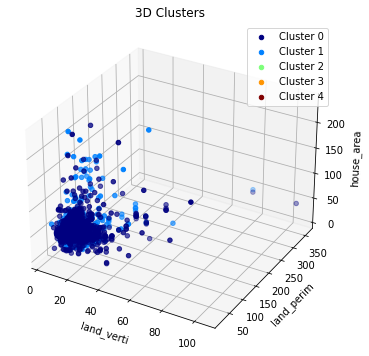

In [231]:
#Visualize the clusters in a 3D plot:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Color map
colors = plt.cm.jet(np.linspace(0, 1, 5))

# Plot each cluster
for cluster in range(5):
    cluster_data = X[X['Cluster'] == cluster]
    ax.scatter(cluster_data['land_verti'], cluster_data['land_perim'], cluster_data['house_area'], 
               color=colors[cluster], label=f"Cluster {cluster}")

ax.set_xlabel('land_verti')
ax.set_ylabel('land_perim')
ax.set_zlabel('house_area')
ax.legend()
plt.title('3D Clusters')
plt.show()

In [232]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [233]:
# Step 1: Import necessary library
import plotly.express as px

def plot_3d_clusters(data, x_col, y_col, z_col, cluster_col):
    """
    Plots a 3D scatter plot of given data with clusters visualized.
    
    Parameters:
    - data: DataFrame with the data
    - x_col: Name of the column for x-axis
    - y_col: Name of the column for y-axis
    - z_col: Name of the column for z-axis
    - cluster_col: Name of the column with cluster labels
    """
    
    # Step 2: Create the 3D scatter plot
    fig = px.scatter_3d(data, 
                        x=x_col, 
                        y=y_col, 
                        z=z_col, 
                        color=cluster_col, 
                        color_continuous_scale='jet', 
                        range_color=[data[cluster_col].min(), data[cluster_col].max()])
    
    # Step 3: Update layout with titles
    fig.update_layout(title='3D Clusters', 
                      scene=dict(xaxis_title=x_col, 
                                 yaxis_title=y_col, 
                                 zaxis_title=z_col))
    
    # Step 4: Show the plot
    fig.show()

# Call the function
plot_3d_clusters(X, 'land_verti', 'land_perim', 'house_area', 'Cluster')

In [234]:
# see total number of each kind of cluster values 
cluster_counts = X['Cluster'].value_counts()
print(cluster_counts)

0    1442
1    1168
Name: Cluster, dtype: int64


In [235]:
# creating cleaned data file
df.to_csv("../2_cleaned_data/a_cleaned_data.csv",index=None)

In [236]:
# creating cleaned data file, with building_age to be labelled manually
df1 = df.copy()

# Adding 'building_age' column to a new copy of the dataframe
df1['building_age'] = "NotDefined"

df1.to_csv("../2_cleaned_data/b_cleaned_data_to_be_labelled_manually.csv",index=None)

In [237]:
# Now open the 'b_cleaned_data_to_be_labelled_manually' file, copy and paste it, in the same folder, and rename it as 'c_cleaned_data_now_labelled'